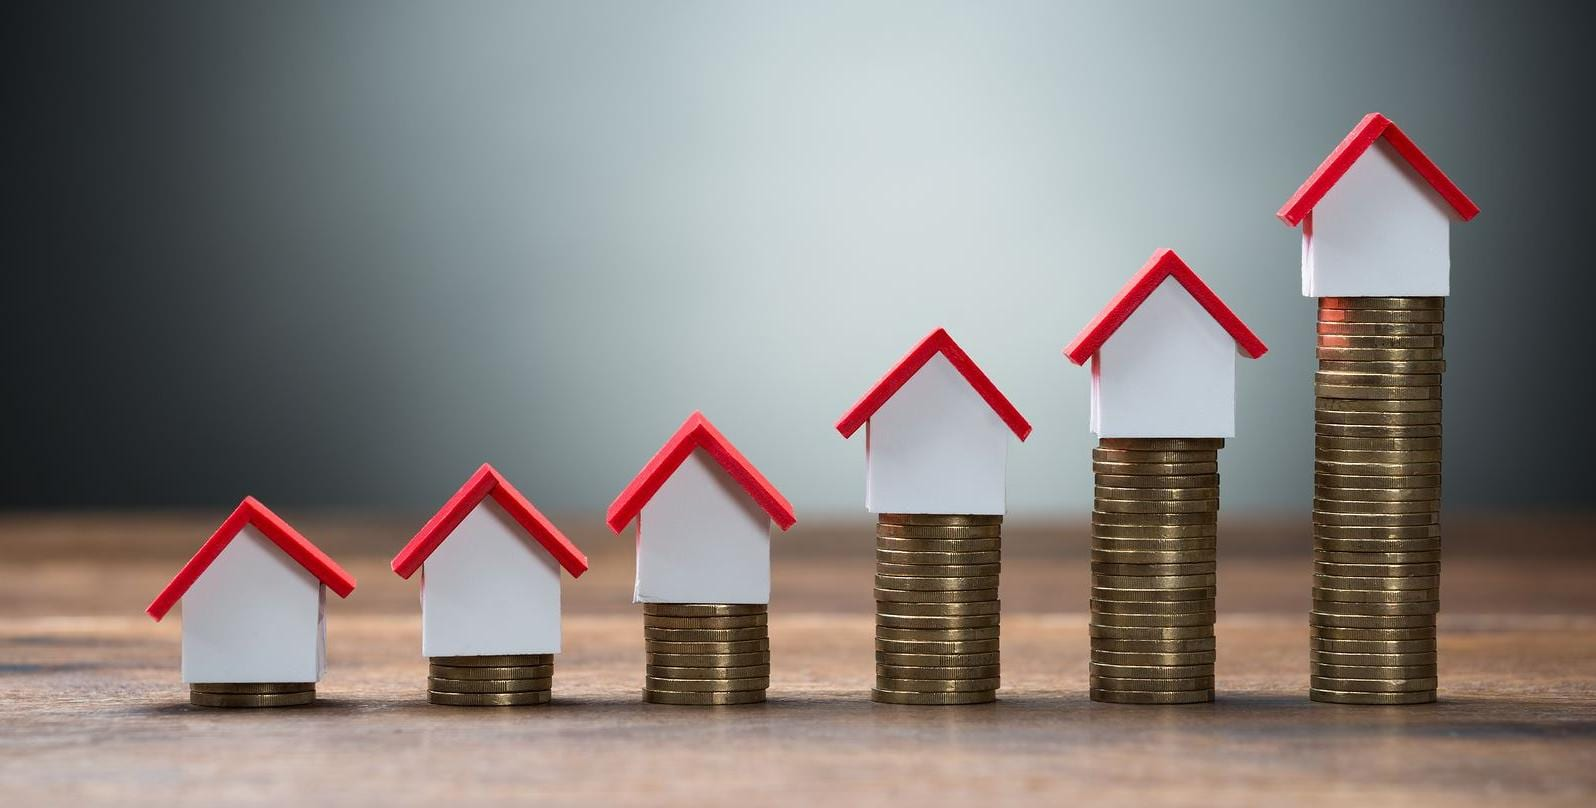

#  House Price Prediction Insights

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

# Practice Skills

#### Creative feature engineering 
#### Advanced regression techniques like Linear Regression, Random forest , Gradient boosting, Decision Tree...etc

# Import Libraries

In [1]:
import pandas as pd

# Pandas:- It is Dataframe Based operation library for Read,Write,Reshape,Concat,Resample
#          and some Data Funations..etc. 
#  Default in Dataframe Row are Observations And Columns are Variables in Table Like Excel.

import numpy as np

# Numapy :- Array/List Based operation for all compitation and Calculations perford from this
#           Library Some Sub libararies in 
# Numpay 1).Scipy.stats for statistics 2).Statsmodel for timeseries 3).Skleran for Machine learning.

import matplotlib.pyplot as plt

# Matplotlib.pyplot:- Viaulaziation library for Creating Charts and most insights window plots,
#                     Create Lables,Titles...etc

import seaborn as sns

# Seaborn :- Seaborn is a Python data visualization library based on Matplotlib that provides 
#     a high-level interface forcreating informative and aesthetically pleasing statistical graphics.

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Ignore the warnings

# Finding Data Path

In [2]:
import io

# Io:- Input/Output library for setting up working directory.

%cd "D:\projects\House prices\data"

D:\projects\House prices\data


# Read Data

In [3]:
# Train Data

housetrain=pd.read_csv("train.csv")

# housetrain is Dataframe Name, pd means pandas , our file is csv thats why .csv

In [4]:
# Test Data

housetest=pd.read_csv("test.csv")

# housetest is Dataframe Name, pd means pandas , our file is csv thats why .csv

# About Data Train And Test

In [5]:
# Train Data

housetrain.info()

# info function is used to give size of data, number of rows/observations, number of 
#  columns/variables, non-null values, 
#  DataTypes and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Test Data

housetest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## Data Preprocessing

# Adding temporarily dependent variable in Test Data

In [7]:
housetest["SalePrice"]="test"

# The temporatily depenedent variable is used for row wise concatenation of both Train and test data

# Row Wise concatenation test and train data

In [8]:
combine=pd.concat([housetrain,housetest],axis=0)

# Axis=0 meaning row wise concatenation

# Shape of Data

In [9]:
print("Number of observations:",combine.shape[0])
print("Number of variables:", combine.shape[1])

# Shape[0] finding rows/Observations, Shape[1] finding is Columns/Varables

Number of observations: 2919
Number of variables: 81


# Finding Null values

In [10]:
pd.set_option("display.max_rows",82)
combine.isnull().sum().sort_values(ascending=False)

# with out pd.set_option we dont display more then 10 variables
# isnull()= Missing values
# sum()= sum of missing values


PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
LotFrontage       486
GarageFinish      159
GarageQual        159
GarageCond        159
GarageYrBlt       159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
Functional          2
Utilities           2
BsmtHalfBath        2
BsmtFullBath        2
GarageArea          1
BsmtFinSF1          1
SaleType            1
GarageCars          1
BsmtUnfSF           1
Electrical          1
Exterior2nd         1
Exterior1st         1
KitchenQual         1
TotalBsmtSF         1
BsmtFinSF2          1
TotRmsAbvGrd        0
Fireplaces          0
Id                  0
BedroomAbvGr        0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal   

# Splitting Data

In [11]:
objcols=combine.select_dtypes(include="object")
numcols=combine.select_dtypes(include=np.number)

# For preprocessing we split the data into numaric variables,catgorical variables

# Finding object columns missing values

In [12]:
objcols.isnull().sum().sort_values(ascending=False)/objcols.shape[0]

PoolQC           0.996574
MiscFeature      0.964029
Alley            0.932169
Fence            0.804385
FireplaceQu      0.486468
GarageCond       0.054471
GarageQual       0.054471
GarageFinish     0.054471
GarageType       0.053786
BsmtCond         0.028092
BsmtExposure     0.028092
BsmtQual         0.027749
BsmtFinType2     0.027407
BsmtFinType1     0.027064
MasVnrType       0.008222
MSZoning         0.001370
Utilities        0.000685
Functional       0.000685
Exterior2nd      0.000343
Electrical       0.000343
SaleType         0.000343
Exterior1st      0.000343
KitchenQual      0.000343
RoofStyle        0.000000
Neighborhood     0.000000
SaleCondition    0.000000
ExterQual        0.000000
LotShape         0.000000
LandContour      0.000000
ExterCond        0.000000
PavedDrive       0.000000
LotConfig        0.000000
LandSlope        0.000000
Condition1       0.000000
HouseStyle       0.000000
Condition2       0.000000
Foundation       0.000000
RoofMatl         0.000000
Street      

# Droping the variables that has the missing values more then 95%

In [13]:
objcols=objcols.drop(["PoolQC","MiscFeature"],axis=1)

# If didnot drop the variables that has more then 95% missing values then we 
# may face the during model buildibd.

In [14]:
objcols.isnull().sum().sort_values(ascending=False)/objcols.shape[0]

Alley            0.932169
Fence            0.804385
FireplaceQu      0.486468
GarageCond       0.054471
GarageQual       0.054471
GarageFinish     0.054471
GarageType       0.053786
BsmtExposure     0.028092
BsmtCond         0.028092
BsmtQual         0.027749
BsmtFinType2     0.027407
BsmtFinType1     0.027064
MasVnrType       0.008222
MSZoning         0.001370
Utilities        0.000685
Functional       0.000685
Electrical       0.000343
Exterior2nd      0.000343
SaleType         0.000343
KitchenQual      0.000343
Exterior1st      0.000343
RoofMatl         0.000000
SaleCondition    0.000000
LotShape         0.000000
PavedDrive       0.000000
LandContour      0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
CentralAir       0.000000
HeatingQC        0.000000
Heating          0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
Street           0.000000
Foundation       0.000000
ExterCond   

# Object columns missing values imputation

In [15]:
# Impute more then 70% missing values variables

objcols.Alley=objcols.Alley.fillna("missing")
objcols.Fence=objcols.Fence.fillna("missing")

In [16]:
# Impute less then 70% missing values variables

for col in objcols.columns:
    objcols[col]=objcols[col].fillna(objcols[col].value_counts().idxmax())

In [17]:
objcols.isnull().sum().sort_values(ascending=False)/objcols.shape[0]

MSZoning         0.0
Functional       0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinType2     0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
KitchenQual      0.0
FireplaceQu      0.0
Street           0.0
GarageType       0.0
GarageFinish     0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
Fence            0.0
SaleType         0.0
SaleCondition    0.0
BsmtCond         0.0
BsmtQual         0.0
Foundation       0.0
ExterCond        0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
ExterQual        0.0
SalePrice        0.0
dtype: float64

# We supatre the catgorical columns from numeric columnns

In [18]:
catcols=numcols[['OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd','GarageYrBlt','MoSold', 'YrSold']]

# Finding missing values in catcols

In [19]:
catcols.isnull().sum().sort_values(ascending=False)/catcols.shape[0]

GarageYrBlt     0.054471
OverallQual     0.000000
OverallCond     0.000000
YearBuilt       0.000000
YearRemodAdd    0.000000
MoSold          0.000000
YrSold          0.000000
dtype: float64

# catcols columns missing values imputation

In [20]:
catcols.GarageYrBlt=catcols.GarageYrBlt.fillna(999)

# Here we have imputed the missing values with the coad due to observations are numaric

In [21]:
catcols.isnull().sum().sort_values(ascending=False)/catcols.shape[0]

OverallQual     0.0
OverallCond     0.0
YearBuilt       0.0
YearRemodAdd    0.0
GarageYrBlt     0.0
MoSold          0.0
YrSold          0.0
dtype: float64

# Drop catclos from numeric columns

In [22]:
numcols=numcols.drop(['OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd',
                      'GarageYrBlt','MoSold', 'YrSold'],axis=1)

# Finding missing values in numeric columns

In [23]:
numcols.isnull().sum().sort_values(ascending=False)/numcols.shape[0]

LotFrontage      0.166495
MasVnrArea       0.007879
BsmtFullBath     0.000685
BsmtHalfBath     0.000685
GarageCars       0.000343
BsmtFinSF1       0.000343
BsmtFinSF2       0.000343
BsmtUnfSF        0.000343
TotalBsmtSF      0.000343
GarageArea       0.000343
Id               0.000000
WoodDeckSF       0.000000
ScreenPorch      0.000000
OpenPorchSF      0.000000
EnclosedPorch    0.000000
3SsnPorch        0.000000
TotRmsAbvGrd     0.000000
PoolArea         0.000000
Fireplaces       0.000000
FullBath         0.000000
KitchenAbvGr     0.000000
BedroomAbvGr     0.000000
HalfBath         0.000000
MSSubClass       0.000000
GrLivArea        0.000000
LowQualFinSF     0.000000
2ndFlrSF         0.000000
1stFlrSF         0.000000
LotArea          0.000000
MiscVal          0.000000
dtype: float64

# Numeric Columns imputation

In [24]:
for col in numcols.columns:
    numcols[col]=numcols[col].fillna(numcols[col].median())
    
# Here we have imputed with median because of haveing less then 70% missing values.

In [25]:
numcols.isnull().sum().sort_values(ascending=False)/numcols.shape[0]

Id               0.0
MSSubClass       0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
GarageArea       0.0
GarageCars       0.0
Fireplaces       0.0
TotRmsAbvGrd     0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
FullBath         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
TotalBsmtSF      0.0
BsmtUnfSF        0.0
BsmtFinSF2       0.0
BsmtFinSF1       0.0
MasVnrArea       0.0
LotArea          0.0
LotFrontage      0.0
MiscVal          0.0
dtype: float64

In [26]:
numcols["saleprice"]=objcols.SalePrice

In [27]:
objcols=objcols.drop("SalePrice",axis=1)

# Label Encoding

In [28]:
# when independent variable(X) non numaric or catgorical we assign the numaricl identifiers
# It is used catgorical obejects assign in numaric identifier 0 to n lavels in alphabetic order 

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
catcols_encode=catcols.apply(LabelEncoder().fit_transform)


In [31]:
objcols_encode=objcols.apply(LabelEncoder().fit_transform)

# Scaleing

In [32]:
# When indpendent variable(X): have differnt matmetcal units scaleing must be done because the more
# difference between obesrvation.
# These are three types 1. Standred Scaler, 2. Min-Max Scaler, 3.Robost Scaler

# Now we use Standred Scaler
# The Standred Scaler gives both postive and nagitive values in range

In [33]:
numcols=numcols.drop('saleprice',axis=1)

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
numcols_scale=StandardScaler().fit_transform(numcols)

In [36]:
numcols_scale=pd.DataFrame(numcols_scale,columns=numcols.columns)

# Reset_Index

In [37]:
# We set the index order wise becasue doing in scaleing and encodeing the indexs are not in order

In [38]:
catcols_encode=catcols_encode.reset_index()
objcols_encode=objcols_encode.reset_index()
numcols_scale=numcols_scale.reset_index()
combine=combine.reset_index()

In [39]:
combine_clean=pd.concat([catcols_encode,objcols_encode,numcols_scale],axis=1)

In [40]:
combine_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          2919 non-null   int64  
 1   OverallQual    2919 non-null   int64  
 2   OverallCond    2919 non-null   int64  
 3   YearBuilt      2919 non-null   int64  
 4   YearRemodAdd   2919 non-null   int64  
 5   GarageYrBlt    2919 non-null   int64  
 6   MoSold         2919 non-null   int64  
 7   YrSold         2919 non-null   int64  
 8   index          2919 non-null   int64  
 9   MSZoning       2919 non-null   int32  
 10  Street         2919 non-null   int32  
 11  Alley          2919 non-null   int32  
 12  LotShape       2919 non-null   int32  
 13  LandContour    2919 non-null   int32  
 14  Utilities      2919 non-null   int32  
 15  LotConfig      2919 non-null   int32  
 16  LandSlope      2919 non-null   int32  
 17  Neighborhood   2919 non-null   int32  
 18  Conditio

In [41]:
combine_clean=combine_clean.drop(["index"],axis=1)

In [42]:
combine_clean['SalePrice']=combine.SalePrice

# Split the data train and test

In [43]:
# Eda must be do on train data 
# Predict the Models on test data using train data

In [44]:
housetraindf=combine_clean[combine_clean.SalePrice!="test"]
housetestdf=combine_clean[combine_clean.SalePrice=="test"]

In [45]:
housetestdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1460 to 2918
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    1459 non-null   int64  
 1   OverallCond    1459 non-null   int64  
 2   YearBuilt      1459 non-null   int64  
 3   YearRemodAdd   1459 non-null   int64  
 4   GarageYrBlt    1459 non-null   int64  
 5   MoSold         1459 non-null   int64  
 6   YrSold         1459 non-null   int64  
 7   MSZoning       1459 non-null   int32  
 8   Street         1459 non-null   int32  
 9   Alley          1459 non-null   int32  
 10  LotShape       1459 non-null   int32  
 11  LandContour    1459 non-null   int32  
 12  Utilities      1459 non-null   int32  
 13  LotConfig      1459 non-null   int32  
 14  LandSlope      1459 non-null   int32  
 15  Neighborhood   1459 non-null   int32  
 16  Condition1     1459 non-null   int32  
 17  Condition2     1459 non-null   int32  
 18  BldgT

# EDA (Exploratory Data Analysis)

  Explorertry Data Analysis main aim is Compltly understand the data,


In [46]:
# Descrprtive Stats
pd.set_option("display.max_columns",31)
numcols.describe()

,Id,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.088386,10168.114080,101.396026,441.398253,49.565262,560.739979,1051.756252,1159.581706,336.483727,4.694416,1500.759849,0.429599,0.061322,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1.766701,472.877013,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968
std,842.787043,42.517628,21.317898,7886.996359,178.854579,455.534750,169.179104,439.471764,440.692234,392.362079,428.701456,46.396825,506.051045,0.524676,0.245608,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,0.761506,215.357944,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211
min,1.000000,20.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,730.500000,20.000000,60.000000,7478.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1460.000000,50.000000,68.000000,9453.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2189.500000,70.000000,78.000000,11570.000000,163.500000,733.000000,0.000000,805.000000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2919.000000,190.000000,313.000000,215245.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000


In [47]:
housetraindf.SalePrice=housetraindf.SalePrice.astype("int64")

In [48]:
housetraindf.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [49]:
print("Skewness:",housetraindf.SalePrice.skew())
# Postive Skewness

print("Kurtosis:",housetraindf.SalePrice.kurt())
# Postive Kurtosis

print("Variance:",housetraindf.SalePrice.var())

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529
Variance: 6311111264.297451


plots

<Axes: title={'center': 'Frequency Dirstbuation of Saleprice'}, ylabel='Frequency'>

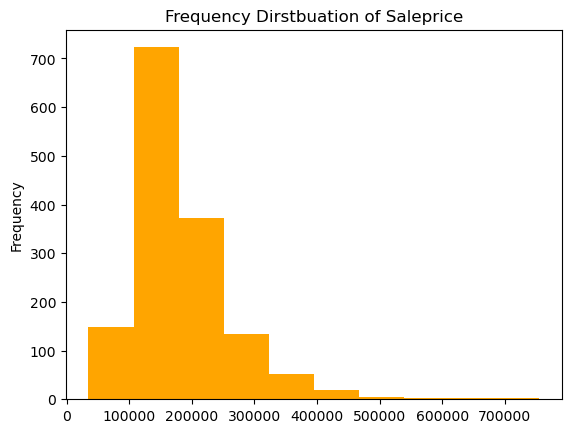

In [50]:
# Histogram - This is highlights the Skewness, Kurosis, Outliers

housetraindf.SalePrice.plot(kind="hist",color="orange",title="Frequency Dirstbuation of Saleprice")

<Axes: title={'center': 'Box Plot of Saleprice'}>

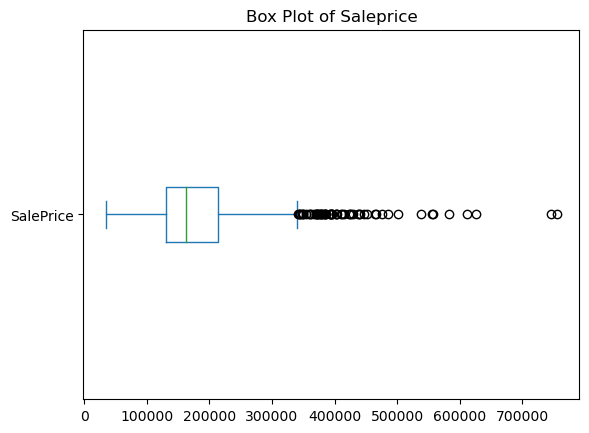

In [51]:
# Boxplot - It is highlights the skewness and outliers

housetraindf.SalePrice.plot(kind="box",vert=False,title="Box Plot of Saleprice")

<Axes: title={'center': 'Normal Dirstbuation curve of Saleprice'}, ylabel='Density'>

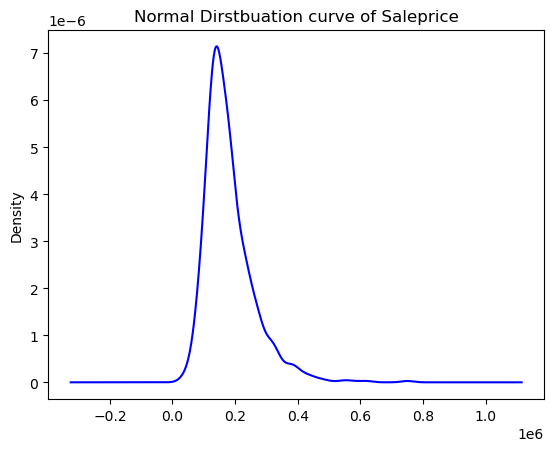

In [52]:
# Density Curve - It is highlights the Skewness and kurtosis

housetraindf.SalePrice.plot(kind="density",color="blue",title="Normal Dirstbuation curve of Saleprice")

## Value_Counts

In [53]:
# Find the How Many types of alleys with visulization in percentail?

housetraindf.Alley.value_counts()

#       Grvl---Gravel(1)
#       Pave---Paved(2)
#       NA---No alley access(0)

2    1369
0      50
1      41
Name: Alley, dtype: int64

Text(0.5, 1.0, 'Types of Alley')

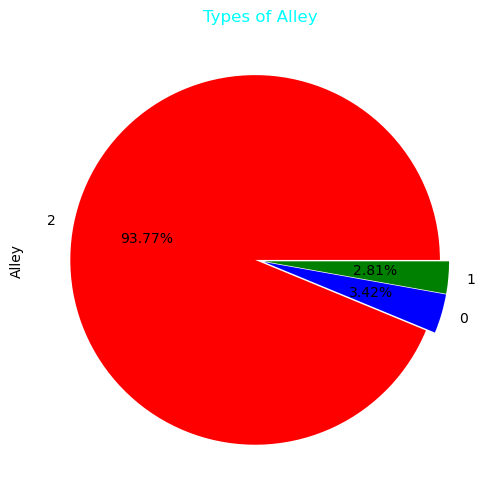

In [54]:
housetraindf.Alley.value_counts().plot(kind="pie",autopct="%.2f%%",explode=(0.03,0.02,0.02),
                                      colors=["red","blue","green"],figsize=(6,6))
plt.title("Types of Alley",color="cyan")



In [55]:
# Find the types of Saletype Count?

housetraindf.SaleType.value_counts()

#       CWD	Warranty Deed - Cash(5)
#       VWD	Warranty Deed - VA Loan(8)
#       New	Home just constructed and sold(6)
#       COD	Court Officer Deed/Estate(0)
#       Con	Contract 15% Down payment regular terms(1)
#       ConLw	Contract Low Down payment and low interest(4)
#       ConLI	Contract Low Interest(3)
#       ConLD	Contract Low Down(2)
#       Oth	Other(7)

8    1267
6     122
0      43
3       9
4       5
5       5
1       4
7       3
2       2
Name: SaleType, dtype: int64

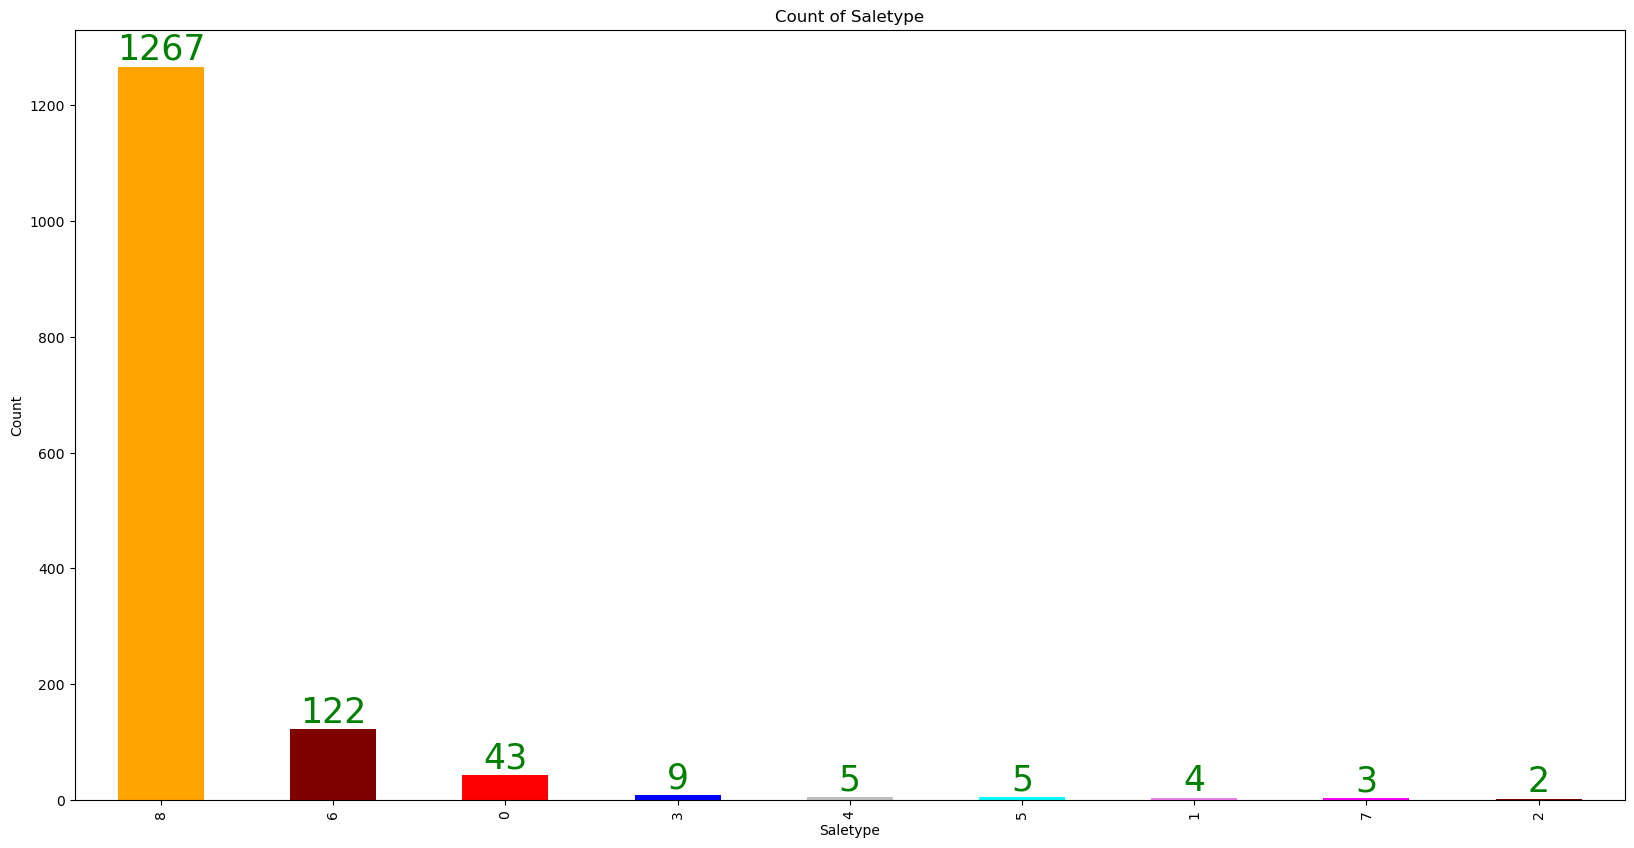

In [56]:
plt.figure(figsize=(20,10))

df=housetraindf.SaleType.value_counts().plot(kind="bar",color=["Orange","Maroon","red","blue",
                                                "silver","cyan","violet","Magenta","maroon"])
for i in df .containers:
    df.bar_label(i,fontsize=25,color="green")
    plt.title("Count of Saletype")
    plt.xlabel("Saletype")
    plt.ylabel("Count")


# Group by

In [57]:
# Find the Average Saleprice of SaleCondition

housetraindf.SalePrice.groupby(housetraindf.SaleCondition).mean()

#       Normal	Normal Sale (4)
#       Abnorml	Abnormal Sale -  trade, foreclosure, short sale (0)
#       AdjLand	Adjoining Land Purchase (1)
#       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit (2)
#       Family	Sale between family members (3)
#       Partial	Home was not completed when last assessed (associated with New Homes) (5)

SaleCondition
0    146526.623762
1    104125.000000
2    167377.416667
3    149600.000000
4    175202.219533
5    272291.752000
Name: SalePrice, dtype: float64

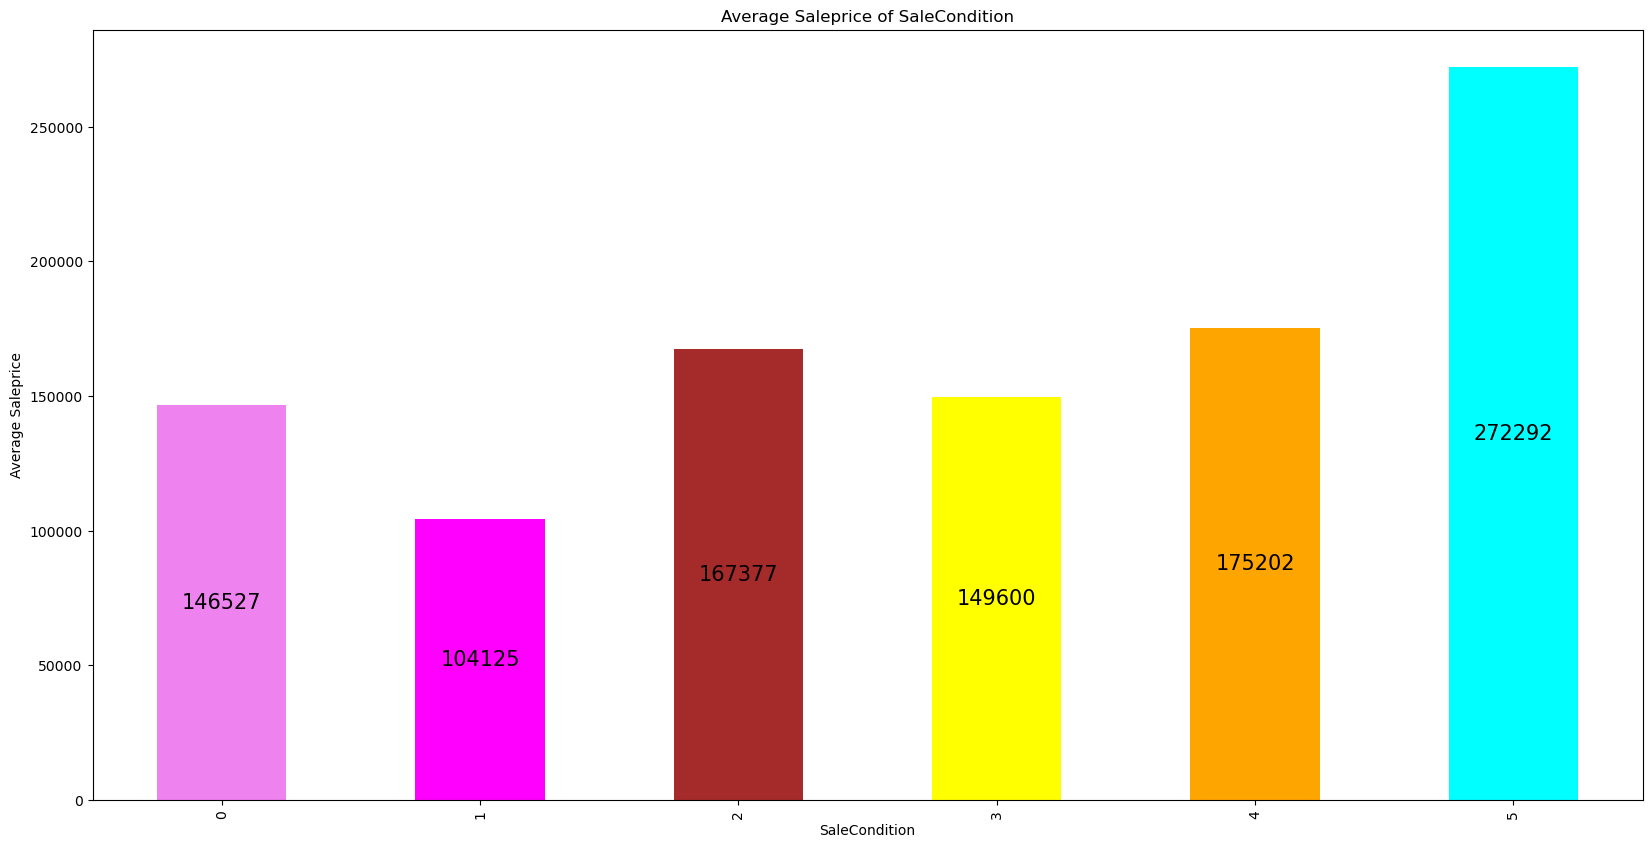

In [58]:
plt.figure(figsize=(20,10))

df=housetraindf.SalePrice.groupby(housetraindf.SaleCondition).mean().plot(kind="bar",
                                                            color=["violet","Magenta","brown","yellow","orange","cyan"])
for i in df .containers:
    df.bar_label(i,fontsize=15,label_type="center")
    plt.title("Average Saleprice of SaleCondition")
    plt.xlabel("SaleCondition")
    plt.ylabel("Average Saleprice")

In [59]:
# Find the Average Saleprice of Street

housetraindf.SalePrice.groupby(housetraindf.Street).mean()

#      Grvl	Gravel (0)
#      Pave	Paved (1)

Street
0    130190.500000
1    181130.538514
Name: SalePrice, dtype: float64

<Axes: title={'center': 'Average Saleprice of Street'}, ylabel='SalePrice'>

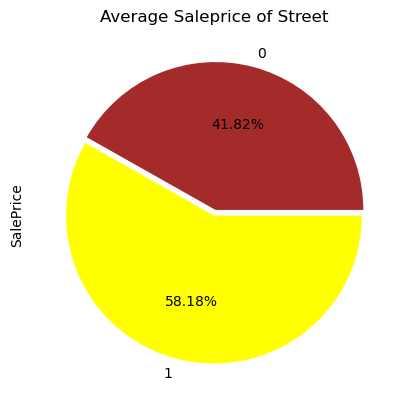

In [60]:

housetraindf.SalePrice.groupby(housetraindf.Street).mean().plot(kind="pie",autopct="%.2f%%",explode=(0.03,0.01),
                                                                colors=["brown","yellow"],title="Average Saleprice of Street")


# Cross Tabulation

In [61]:
# Type of street and type of lotshape

pd.crosstab(housetraindf.Street,housetraindf.LotShape)

#       STREET                          Lotshape
#      Grvl	Gravel (0)               Reg	Regular (3)
#      Pave	Paved (1)                IR1	Slightly irregular (0)
#                                    IR2	Moderately Irregular (1)
#                                    IR3	Irregular (2)

LotShape,0,1,2,3
Street,,,,
0,1,1,0,4
1,483,40,10,921


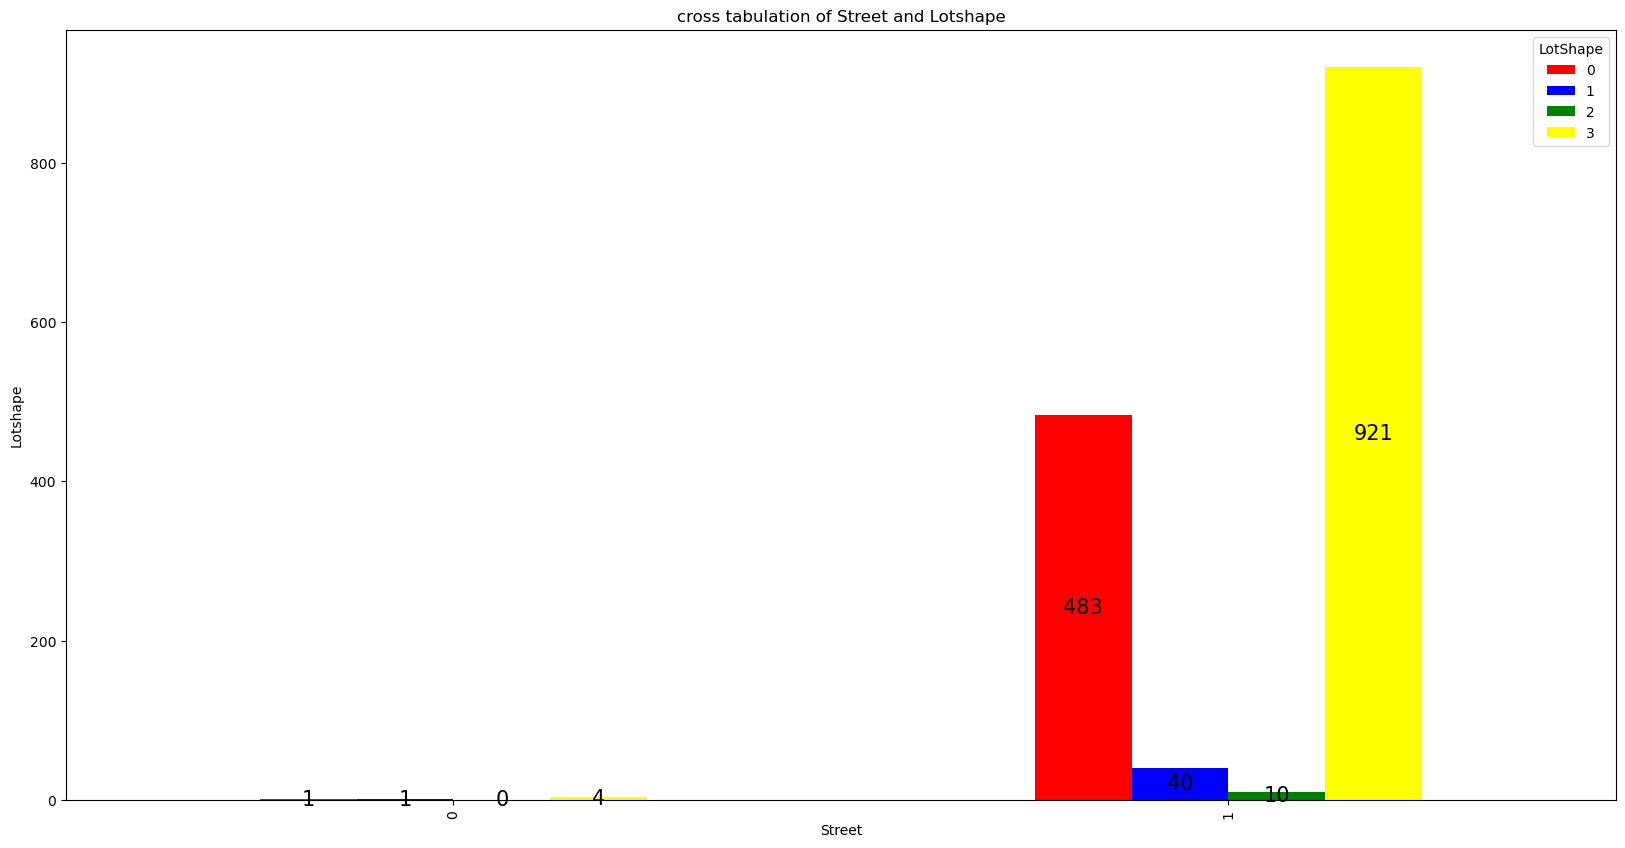

In [62]:

df=pd.crosstab(housetraindf.Street,housetraindf.LotShape)
ax=df.plot.bar(stacked=False,color=["red","blue","green","yellow"],figsize=(20,10))
for i in ax.containers:
    ax.bar_label(i,fontsize=15,label_type="center")
    plt.title("cross tabulation of Street and Lotshape")
    plt.xlabel("Street")
    plt.ylabel("Lotshape")

In [63]:
# Type of RoofStyle and type of RoofMatl

pd.crosstab(housetraindf.RoofStyle,housetraindf.RoofMatl)

RoofMatl,0,1,2,3,4,5,6,7
RoofStyle,,,,,,,,
0,0,1,1,1,0,10,0,0
1,0,1134,0,0,1,1,0,5
2,0,11,0,0,0,0,0,0
3,1,282,0,0,0,0,2,1
4,0,5,0,0,0,0,2,0
5,0,1,0,0,0,0,1,0


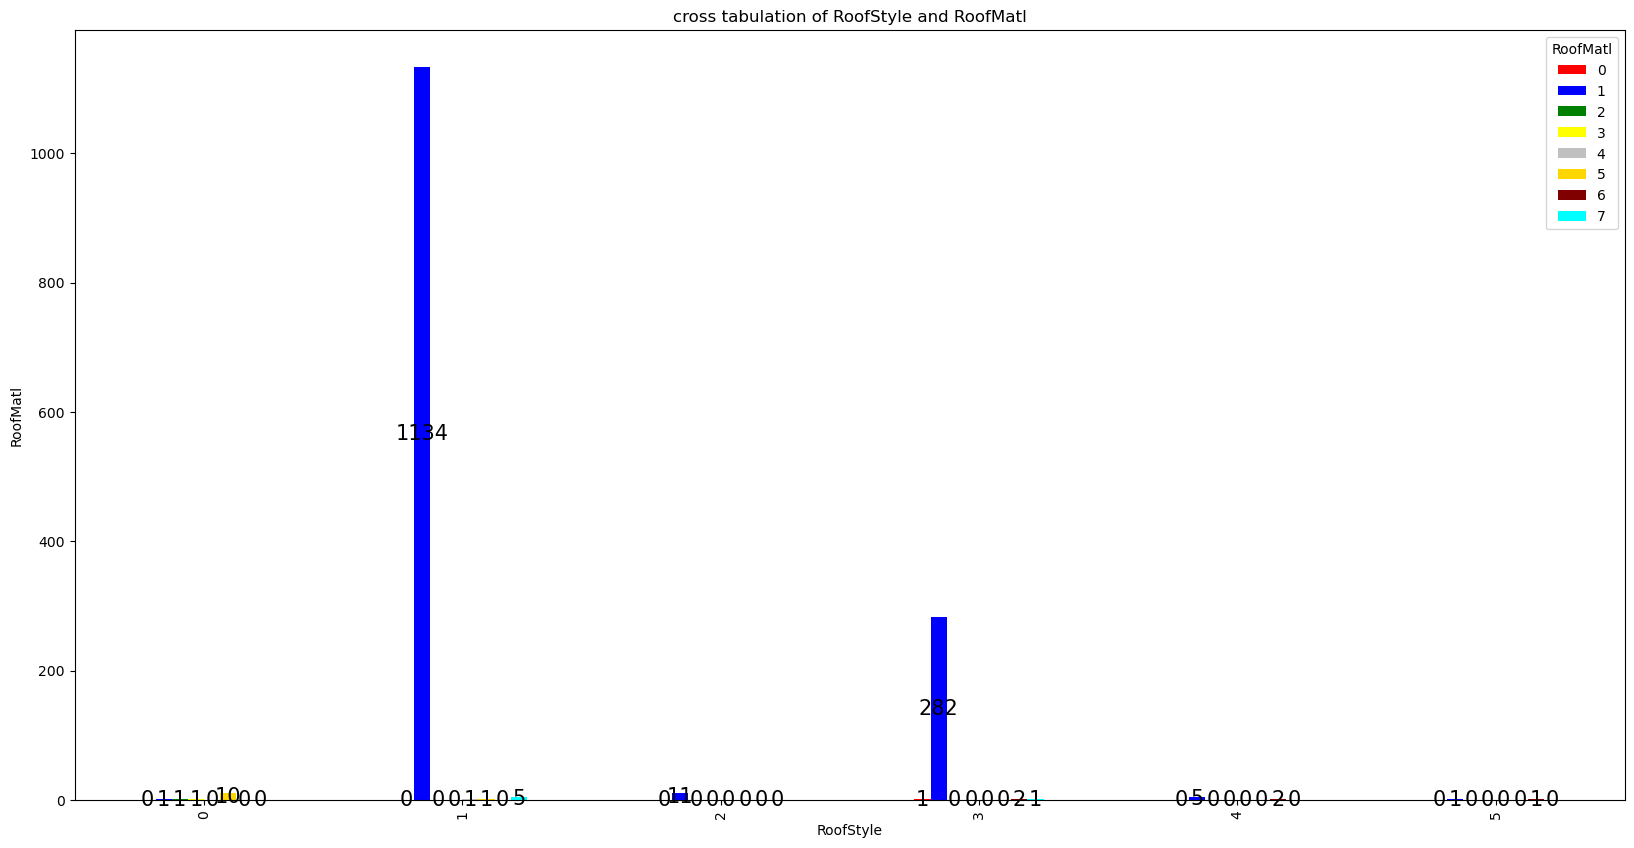

In [64]:
df=pd.crosstab(housetraindf.RoofStyle,housetraindf.RoofMatl)
ax=df.plot.bar(stacked=False,color=["red","blue","green","yellow",'silver','gold','maroon',"cyan"],figsize=(20,10))
for i in ax.containers:
    ax.bar_label(i,fontsize=15,label_type="center")
    plt.title("cross tabulation of RoofStyle and RoofMatl")
    plt.xlabel("RoofStyle")
    plt.ylabel("RoofMatl")

# Hypohesis Testing

In [65]:
# Statical interface method of validate particular hypothesis using given data.
# Conducting hypothesis before data have no missing values, minimum outlaiers,closed to nrml dist.

In [66]:

from scipy.stats import ttest_ind # 2Classes (one numeric and one Catgorical)

# Null Hypothesis - No signficant deffrernce between variables/columns
# Alt. Hypothesis - Signficant deffrernce between variables/columns

from scipy.stats import f_oneway  # Morethen 2 classes (one numeric and one Catgorical)

# Null Hypothesis - No signficant deffrernce between variables/columns
# Alt. Hypothesis - Signficant deffrernce between variables/columns

from scipy.stats import chi2_contingency # Both Catgorical variables using crosstab

# Null Hypothesis - No relation/association  between variables/columns
# Alt. Hypothesis - relation/association  between variables/columns

# p-value less then 0.05 Reject null
# p-value grater then 0.05 Field to Reject null(Acceptance)


In [67]:
# Test Null Average SalePrice of different Street Equal

housetraindf.SalePrice.groupby(housetraindf.Street).mean()

Street
0    130190.500000
1    181130.538514
Name: SalePrice, dtype: float64

In [68]:
# spliting Class

street0=housetraindf[housetraindf.Street==0]
street1=housetraindf[housetraindf.Street==1]

In [69]:
# Testing

ttest_ind(street0.SalePrice,street1.SalePrice,equal_var=False)

# p-value is 0.11504797250476277 garter then 0.05 Failed to reject null

Ttest_indResult(statistic=-1.900787855911007, pvalue=0.11504797250476277)

In [70]:
# Test Null Average SalePrice of different CentralAir Equal

housetraindf.SalePrice.groupby(housetraindf.CentralAir).mean()

CentralAir
0    105264.073684
1    186186.709890
Name: SalePrice, dtype: float64

In [71]:
# spliting Class

CentralAir0=housetraindf[housetraindf.CentralAir==0]
CentralAir1=housetraindf[housetraindf.CentralAir==1]

In [72]:
# Testing

ttest_ind(CentralAir0.SalePrice,CentralAir1.SalePrice,equal_var=False)

# p-value is 2.280814388186851e-37 less then 0.05  reject null

Ttest_indResult(statistic=-17.267772563668995, pvalue=2.280814388186851e-37)

In [73]:
# Test Null Average SalePrice of different LandSlope Equal

housetraindf.SalePrice.groupby(housetraindf.LandSlope).mean()

LandSlope
0    179956.799566
1    196734.138462
2    204379.230769
Name: SalePrice, dtype: float64

In [74]:
# spliting Class

LandSlope0=housetraindf[housetraindf.LandSlope==0]
LandSlope1=housetraindf[housetraindf.LandSlope==1]
LandSlope2=housetraindf[housetraindf.LandSlope==2]


In [75]:
# Testing

f_oneway(LandSlope0.SalePrice,LandSlope1.SalePrice,LandSlope2.SalePrice)

# p-value is 0.1413963584114019 garter then 0.05 Failed to reject null

F_onewayResult(statistic=1.9588170374149438, pvalue=0.1413963584114019)

In [76]:
# Test Null Averaage SalePrice of Different LotShape Equal

housetraindf.SalePrice.groupby(housetraindf.LotShape).mean()

LotShape
0    206101.665289
1    239833.365854
2    216036.500000
3    164754.818378
Name: SalePrice, dtype: float64

In [77]:
# spliting Class

LotShape0=housetraindf[housetraindf.LotShape==0]
LotShape1=housetraindf[housetraindf.LotShape==1]
LotShape2=housetraindf[housetraindf.LotShape==2]
LotShape3=housetraindf[housetraindf.LotShape==3]


In [78]:
# Testing

f_oneway(LotShape0.SalePrice,LotShape1.SalePrice,LotShape2.SalePrice,LotShape3.SalePrice)

# # p-value is 6.447523852011766e-25 less then 0.05  reject null

F_onewayResult(statistic=40.132851662262944, pvalue=6.447523852011766e-25)

In [79]:
# Test the null Association between RoofStyle and RoofMatl

pd.crosstab(housetraindf.RoofStyle,housetraindf.RoofMatl)

RoofMatl,0,1,2,3,4,5,6,7
RoofStyle,,,,,,,,
0,0,1,1,1,0,10,0,0
1,0,1134,0,0,1,1,0,5
2,0,11,0,0,0,0,0,0
3,1,282,0,0,0,0,2,1
4,0,5,0,0,0,0,2,0
5,0,1,0,0,0,0,1,0


In [80]:
# Testing

chi2_contingency(pd.crosstab(housetraindf.RoofStyle,housetraindf.RoofMatl))

# p-value is 6.136147395086713e-306 less then 0.05  reject null

Chi2ContingencyResult(statistic=1561.2165484915956, pvalue=6.136147395086713e-306, dof=35, expected_freq=array([[8.90410959e-03, 1.27684932e+01, 8.90410959e-03, 8.90410959e-03,
        8.90410959e-03, 9.79452055e-02, 4.45205479e-02, 5.34246575e-02],
       [7.81506849e-01, 1.12068082e+03, 7.81506849e-01, 7.81506849e-01,
        7.81506849e-01, 8.59657534e+00, 3.90753425e+00, 4.68904110e+00],
       [7.53424658e-03, 1.08041096e+01, 7.53424658e-03, 7.53424658e-03,
        7.53424658e-03, 8.28767123e-02, 3.76712329e-02, 4.52054795e-02],
       [1.95890411e-01, 2.80906849e+02, 1.95890411e-01, 1.95890411e-01,
        1.95890411e-01, 2.15479452e+00, 9.79452055e-01, 1.17534247e+00],
       [4.79452055e-03, 6.87534247e+00, 4.79452055e-03, 4.79452055e-03,
        4.79452055e-03, 5.27397260e-02, 2.39726027e-02, 2.87671233e-02],
       [1.36986301e-03, 1.96438356e+00, 1.36986301e-03, 1.36986301e-03,
        1.36986301e-03, 1.50684932e-02, 6.84931507e-03, 8.21917808e-03]]))

In [81]:
# Test the null Association between Foundation and Heating

pd.crosstab(housetraindf.Foundation,housetraindf.Heating)


Heating,0,1,2,3,4,5
Foundation,,,,,,
0,0,128,10,6,2,0
1,1,626,6,1,0,0
2,0,647,0,0,0,0
3,0,19,1,0,0,4
4,0,5,1,0,0,0
5,0,3,0,0,0,0


In [82]:
# Testing

chi2_contingency(pd.crosstab(housetraindf.Foundation,housetraindf.Heating))

# p-value is 3.6959529890464758e-62 less then 0.05  reject null

Chi2ContingencyResult(statistic=365.34354286755007, pvalue=3.6959529890464758e-62, dof=25, expected_freq=array([[1.00000000e-01, 1.42800000e+02, 1.80000000e+00, 7.00000000e-01,
        2.00000000e-01, 4.00000000e-01],
       [4.34246575e-01, 6.20104110e+02, 7.81643836e+00, 3.03972603e+00,
        8.68493151e-01, 1.73698630e+00],
       [4.43150685e-01, 6.32819178e+02, 7.97671233e+00, 3.10205479e+00,
        8.86301370e-01, 1.77260274e+00],
       [1.64383562e-02, 2.34739726e+01, 2.95890411e-01, 1.15068493e-01,
        3.28767123e-02, 6.57534247e-02],
       [4.10958904e-03, 5.86849315e+00, 7.39726027e-02, 2.87671233e-02,
        8.21917808e-03, 1.64383562e-02],
       [2.05479452e-03, 2.93424658e+00, 3.69863014e-02, 1.43835616e-02,
        4.10958904e-03, 8.21917808e-03]]))

# Model's Building

In [83]:
housetestdf=housetestdf.drop("SalePrice",axis=1)

In [84]:
# Spliting Independent Variables And Dependent Variable

y=housetraindf.SalePrice
X=housetraindf.drop('SalePrice',axis=1)

# y=Dependent Variable, X=Dependent Variables

In [85]:
y.head()

# Depenedent Variable Numeric Variable

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

<Axes: xlabel='SalePrice', ylabel='Density'>

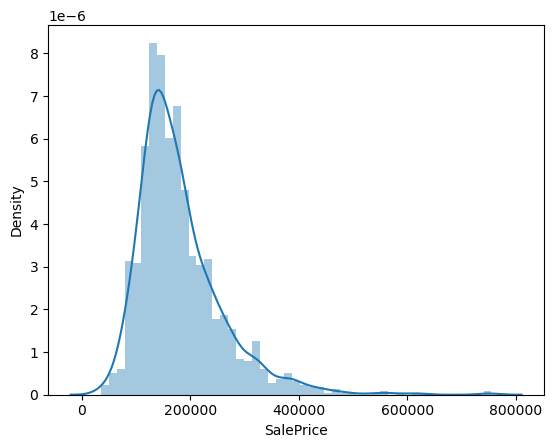

In [86]:
sns.distplot(y)

# This plots shows Postive Skewness 

In [87]:
# postive skewness=log.transfor or Sqare root Reansfor
# We choose log.transfor

y=np.log1p(y)

<Axes: xlabel='SalePrice', ylabel='Density'>

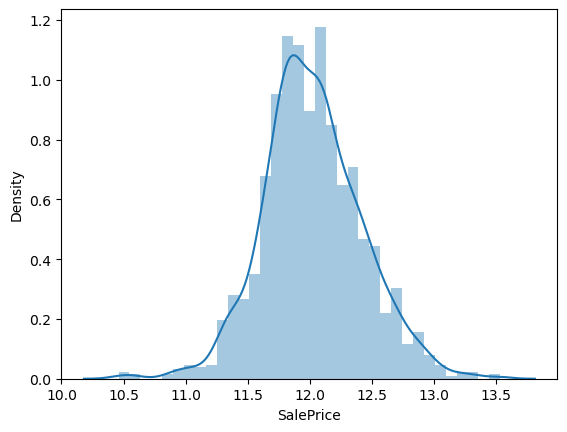

In [88]:
sns.distplot(y)

In [89]:
# This depenedent variable have numeric values now we build the "REGRESSION" Models

# Regression

In [90]:
# In the dependent variable must be in numeric , continus.
# In the numeric varibles are no missing values, closed to normal dirstbuation,minumum outlier
# no multicolinarty between any two variables, if have multicolinarty the prblm have over fitting, mulicolinarty(>0.95) 

# Checking Multicolinarty

<Axes: >

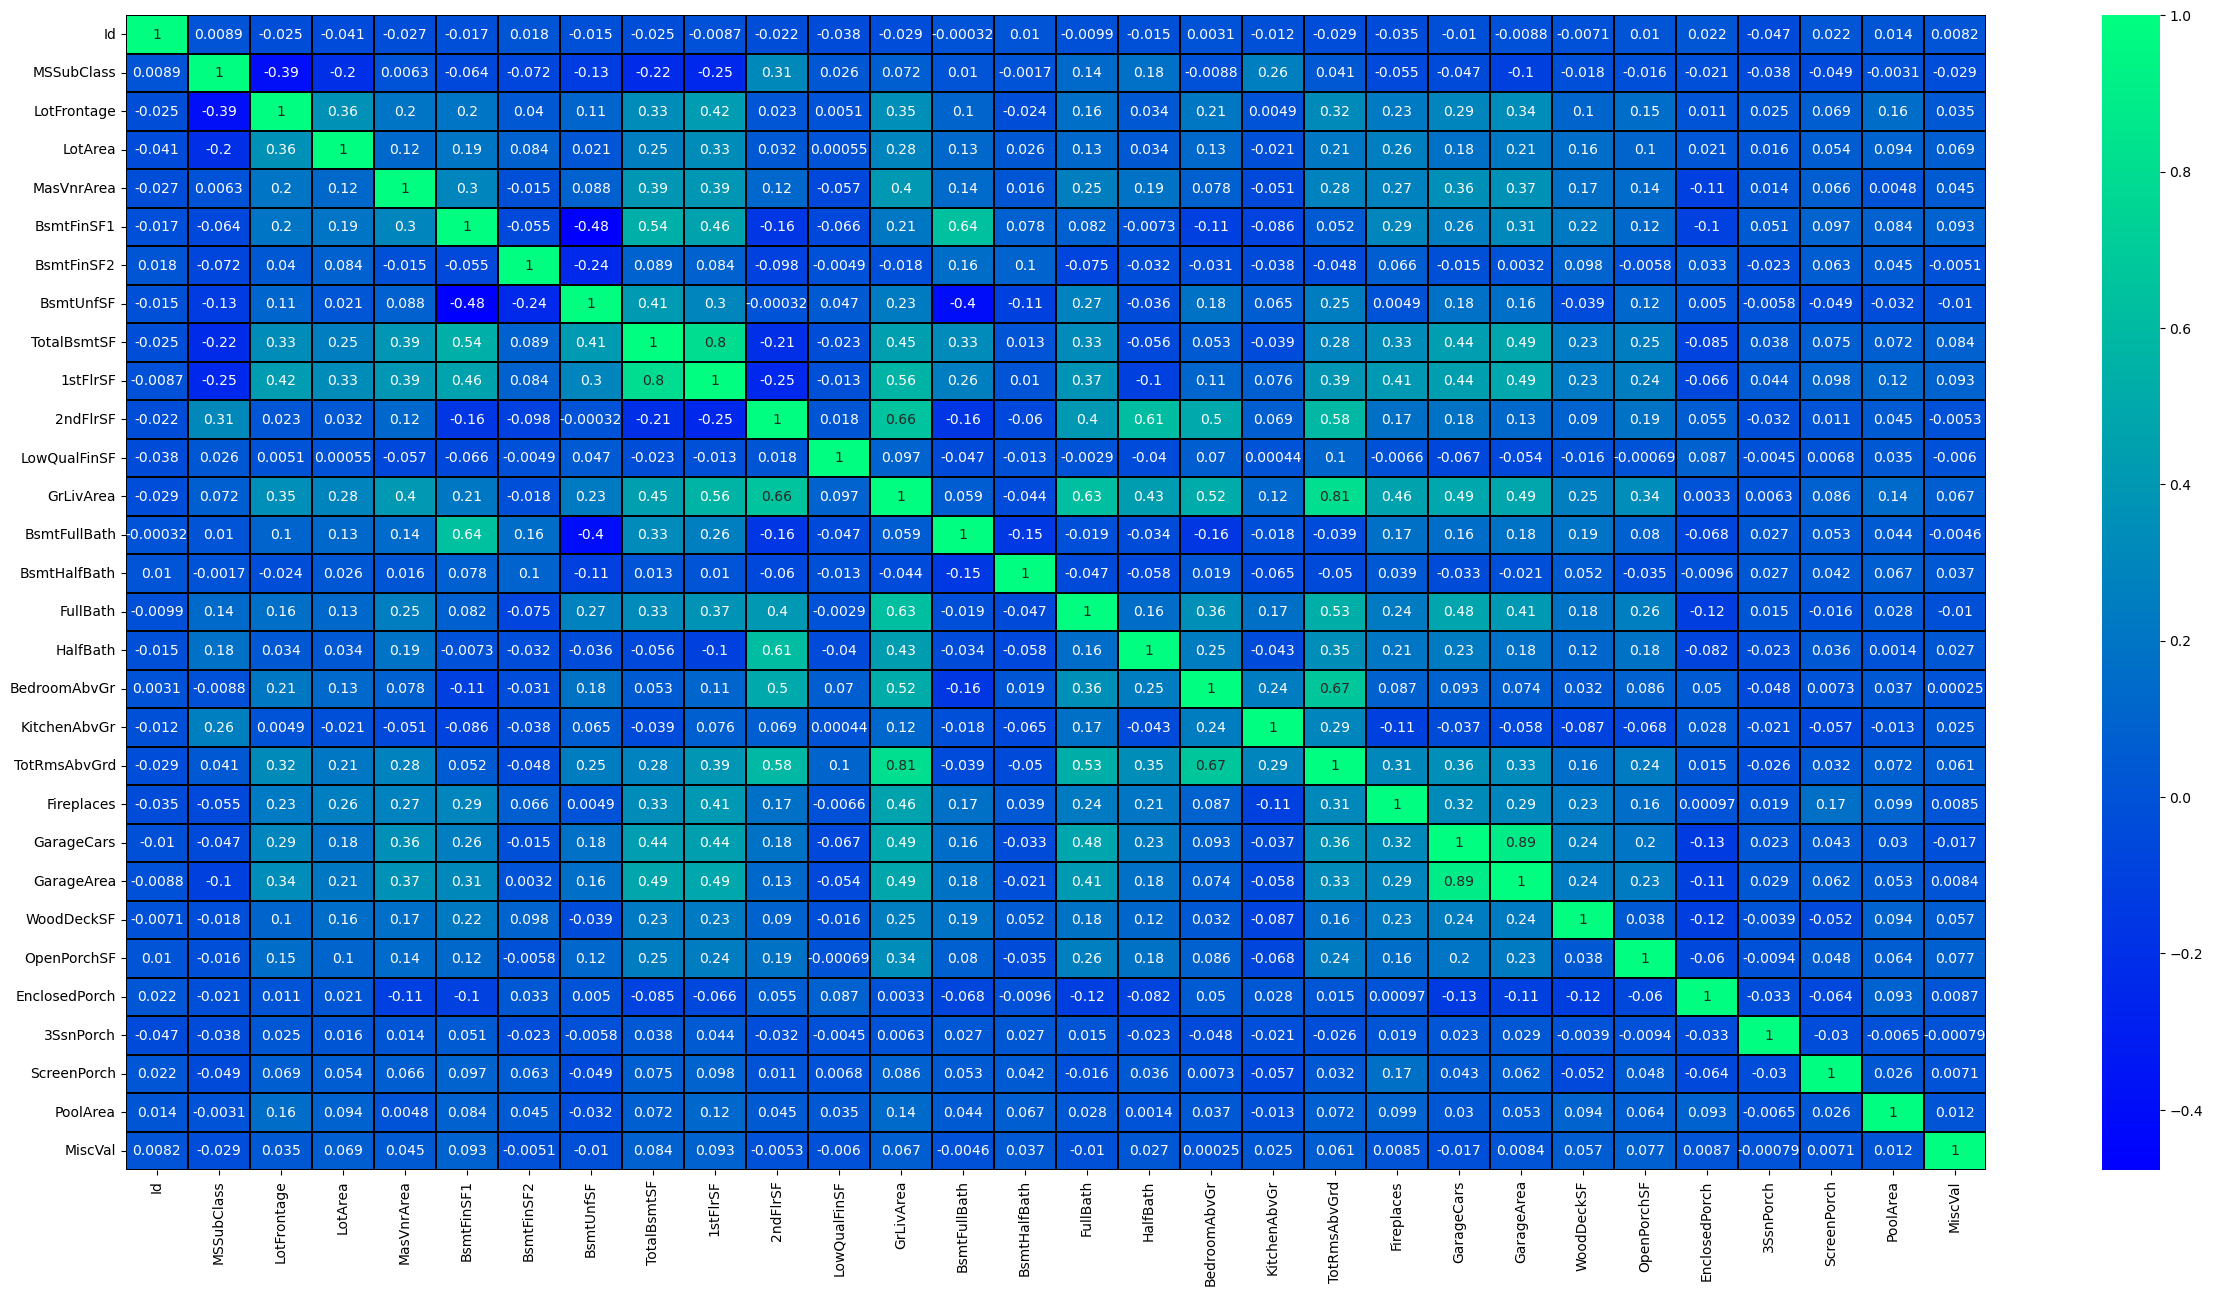

In [91]:
plt.figure(figsize=(30,15))

sns.heatmap(numcols.corr(),annot=True,cmap="winter",linewidths=0.01,linecolor="black")

# No multicolinarty in the data

# 1. Linear Regression

In [92]:
# It is supervise learning algoritm we easily find which is dependent variable and which is independent variable.
# Mainly it is find linera relation between both independent and numaric dependent variables.

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [94]:
linearReg=LinearRegression()

In [95]:
linearReg_Model=linearReg.fit(X,y)

In [96]:
linearReg_Model.score(X,y)

0.8867121414872576

In [97]:
cross_val_score(linearReg,X,y)

array([0.89538155, 0.85602363, 0.8848379 , 0.88280883, 0.73657645])

In [98]:
np.mean([0.89538155, 0.85602363, 0.8848379 , 0.88280883, 0.73657645])

0.851125672

In [99]:
linearReg_Pred1=linearReg_Model.predict(X)

In [100]:
linearReg_Pred=linearReg_Model.predict(housetestdf)

In [101]:
pd.DataFrame(np.exp(linearReg_Pred)).to_csv("linerreg.csv")

# DecisionTree

In [102]:
# Single Tree Algoritham -Decision Tree is a Binary splitting and recursive  partitioning tree
# decision tree has a root node on top which splitss into decision nodes and further splits into leaf node/terminl node or
# further decision nodes.
# Recursive partitioning is tree splits on pervious node number of observations. Once all observation are classified into 
# leafnodes or terminal nodes, Tree growth will stop.

In [103]:
from sklearn.tree import DecisionTreeRegressor

In [104]:
tree_reg=DecisionTreeRegressor(max_depth=8)

In [105]:
tree_regModel=tree_reg.fit(X,y)

In [106]:
tree_regModel.score(X,y)

0.9497058081526133

In [107]:
cross_val_score(tree_reg,X,y)

array([0.72126452, 0.73926786, 0.75782884, 0.79411667, 0.76949861])

In [108]:
np.mean([0.73190785, 0.72272772, 0.77123736, 0.77648282, 0.75507841])

0.751486832

In [109]:
tree_regpred=tree_regModel.predict(housetestdf)

In [110]:
pd.DataFrame(np.exp(tree_regpred)).to_csv("Treereg.csv")

# 3. Random Forest

In [111]:
# MultiTree Models - Ensemble Techniques - Bagging - Random Algorithm
# Bagging also called as Bootstrap Aggregating
# is an ensemble learning technique that helps to improve the performance and accuracy of machine learning algorithms. 
# It is used to deal with bias-variance trade-offs and reduces the variance of a prediction model. 
# Bagging avoids overfitting of data and is used for both regression and classification models, 
# specifically for decision tree algorithms.

In [112]:
from sklearn.ensemble import RandomForestRegressor

In [113]:
RF_Reg=RandomForestRegressor(n_estimators=1000)

In [114]:
RF_RegModel=RF_Reg.fit(X,y)

In [115]:
RF_RegModel.score(X,y)

0.9831293975883845

In [116]:
cross_val_score(RF_Reg,X,y)

array([0.87723577, 0.87185548, 0.87801176, 0.88446025, 0.85623941])

In [117]:
np.mean([0.87620717, 0.87108941, 0.87722839, 0.88298201, 0.85747335])

0.872996066

In [118]:
RF_Regpred=RF_RegModel.predict(housetestdf)

In [119]:
pd.DataFrame(np.exp(RF_Regpred)).to_csv("RandomForest.csv")

# 4.GradientBoosting

In [120]:
# Supervised Learning _ Ensemble methods -Boosting Method - Gradient Boosting Machine
# Boosting Algorthms are developed to improve the accuracy of the machine learning 
# models by targeting weak leaners or wrong pread.
# Gradiante boosting machine algorithm is both classification and regression algorithm

In [121]:
from sklearn.ensemble import GradientBoostingRegressor

In [122]:
GB_Reg=GradientBoostingRegressor(n_estimators=1000)

In [123]:
GB_RegModel=GB_Reg.fit(X,y)

In [124]:
GB_RegModel.score(X,y)

0.9973158788866384

In [125]:
cross_val_score(GB_Reg,X,y)

array([0.9115085 , 0.88857668, 0.8974559 , 0.90720345, 0.84472989])

In [126]:
np.mean([0.91052374, 0.88938467, 0.89761103, 0.90747672, 0.84663226])

0.8903256839999999

In [127]:
GB_RegPred=GB_RegModel.predict(housetestdf)

In [128]:
pd.DataFrame(np.exp(GB_RegPred)).to_csv("GB1.csv")

# 5.Support Vector Machines (SVM)

In [129]:
# Supervised Learning - Support Vector Machines (SVM)
# Used for Classification as well as Regression problems but predominatly
# used in Classification.
# Objective of SVM algorithm is to draw a straight line also called as
# Maximum Margin Hyperplance that distinctly seperates both classes.

In [130]:
from sklearn.svm import SVR

In [131]:
sv_reg=SVR()

In [132]:
sv_regModel=sv_reg.fit(X,y)

In [133]:
sv_regModel.score(X,y)

0.852857384754038

In [134]:
cross_val_score(sv_reg,X,y)

array([0.85513157, 0.8245611 , 0.85502455, 0.84810677, 0.7622143 ])

In [135]:
np.mean([0.85513157, 0.8245611 , 0.85502455, 0.84810677, 0.7622143 ])

0.8290076580000001

In [136]:
sv_regpred=sv_regModel.predict(housetestdf)

In [137]:
pd.DataFrame(np.exp(sv_regpred)).to_csv("SVR.csv")

# 6.KNeighbors 

In [138]:
# K Nearest Neighbors or KNN algorithm in supervised learning which is used for both Regression and Classification. 
# Predominantly used in classification. 
# Also used as Missing Value Imputation Algorithm.
# KNN is one of the simplest algorithms that uses distance based calculations as part of methodology.

In [139]:
from sklearn.neighbors import KNeighborsRegressor

In [140]:
knn_reg=KNeighborsRegressor(n_neighbors=3)

In [141]:
knn_regModel=knn_reg.fit(X,y)

In [142]:
knn_regModel.score(X,y)

0.8410737297904378

In [143]:
cross_val_score(knn_reg,X,y)

array([0.64111281, 0.66541146, 0.67976983, 0.61530764, 0.64043701])

In [144]:
np.mean([0.64111281, 0.66541146, 0.67976983, 0.61530764, 0.64043701])

0.64840775

In [145]:
knn_regPred=knn_regModel.predict(housetestdf)

In [146]:
pd.DataFrame(np.exp(knn_regPred)).to_csv("KNN_Reg.csv")

# Conclusion:

In [147]:
# The linear regression model is the best model for house price prediction with "88.67". 
# In the Kaggle Competition, I got good score comparison with other models.
# The mean of cross validation score also closed to R-Square Value.


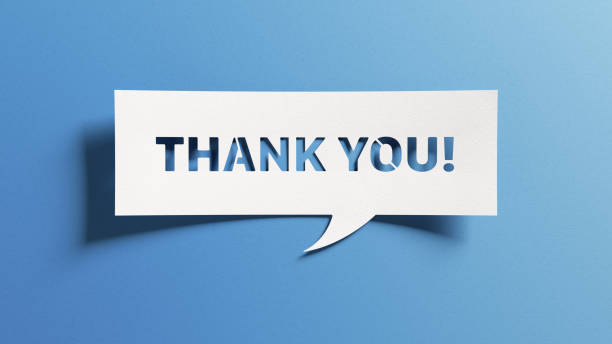